# Milestone 2
# Part 1: 
- Merge 6 datasets covering digital access, agriculture output, food stability, financial inclusion, mobile money transaction, and demography in 10 ASEAN countries, and 6 South Asian countries.
- Goal: Provide a comprehensive for other researchers for their future research. The final merged dataset has over 130 variables. We thought this merged dataset would be helpful for researchers who are interested in analyzing the relationship between Fintech and agricultural poor in Asia. 

# Part 2:
- We refine our research scope for Milestone 2 and process, merge, and use only limited number variables to get descriptive statistics, visualizations, and regression analysis.


______________________________



Research Question: What is the impact of mobile cellular subscriptions on food supply in ASEAN and South Asian countries?


Empirical Model: 
$$
\log(\text{Food Supply})_{it} = \beta_0 + \beta_1 \log(\text{Mobile Subscriptions})_{it} + \beta_2 X_{it} + \epsilon_{it}
$$


**1.	Variables:**

-	Dependent Variable: Food supply quantity 

-	Independent Variables: Mobile cellular subscription

-	Control Variables: total population, urban population, rural population, life expectancy, mortality rate, population density, poverty headcount ratio, population growth, fertility rate, GDP per capita
 
-	Time: 2011-2024
-	Region: ASEAN and South Asia
-	Number of Country: 16

    -	ASEAN: 'VNM','LAO','THA','KHM','MYS','SGP','MMR','PHL','BRN','IDN'
    -	South Asia = 'BGD','IND','PAK','NPL','LKA','BTN'

-	Note: (Which variable) is collected only every 4 year

**2.	Data Source (Detailed link is listed in [Readme](https://github.com/Graspp-25-Spring/graspp_2025s_fintech/blob/review_milestone2/README.md)) and Download Method:** 

- Dependent Variable: 
    -	Source: Credit to Agriculture, Value Added (Agriculture, Forestry and Fishing), Value Added (Manufacture of food and beverages), Fertilizer consumption are from World Bank FAO; Use of Financial Services, mobile money transactions is from Financial Access Survey, IMF
    -	Method: API and manually download csv files

- Independent Variables: 
    -	World Development Indicators (WDI) and Findex
    -	Method: construct the download workbank data function to fetch data


- Control Variables: 
    -	Source: All from World Development Indicators (WDI), World Bank 
    -	Method: construct the download workbank data function to fetch data




# Part 1

# 1. Data sets

In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
def basic_stats(df):
    countries = list(df['country'].unique())
    n_countries = len(countries) 
    time_series = f"{df.year.min()} ~ {df.year.max()}"
    missing_data_summary = df.drop(['country','year'], axis=1).notna().sum()
    
    return {
        'countries (first 5)': countries[:5],
        'country_count': n_countries,
        'time_series': time_series,
        'observations_bycolumn': missing_data_summary
    }


## 1.1 Agri (Agriculture Output)
- Source: World Bank FAO

In [ ]:
df_agri = pd.read_csv('../data/processed/Agriculture_data.csv')
df_agri = df_agri.rename(columns={'code': 'country'})
df_agri = df_agri[(df_agri['year'] >= 2011) & (df_agri['year'] <= 2024)]
df_agri.head(2)

,country,year,FarmCredit,ICTPolicy,ProductionValue,ProcessingValue,Fertilizer
11,BGD,2011,3271.100803,NaN,1.649775e+06,NaN,NaN
12,BGD,2012,3213.392664,NaN,1.854820e+06,249808.744409,NaN


In [ ]:
basic_stats(df_agri)

{'countries (first 5)': ['BGD', 'BRN', 'BTN', 'IDN', 'IND'],
 'country_count': 16,
 'time_series': '2011 ~ 2023',
 'observations_bycolumn': FarmCredit         42
 ICTPolicy          34
 ProductionValue    55
 ProcessingValue    82
 Fertilizer          0
 dtype: int64}

- In this section, we examine agricultural output using data from the World Bank FAO. The dataset includes key indicators such as farm credit, ICT policy presence, agricultural production value, food and beverage processing value, and fertilizer usage. Our summary shows data coverage for 16 countries from 2000 to 2023. 

- Among these indicators, production and processing values have the most complete records, with 99 and 111 observations respectively. This suggests relatively strong data availability for measuring economic contributions of agricultural and food sectors, while access to farm credit and ICT policy information is more limited across countries and years.

## 1.2 Con (Control Variables)
- Source: WDI

In [ ]:
df_con = pd.read_csv('../data/processed/control_var.csv')
df_con = df_con.drop(['country'], axis = 'columns').rename(columns={'code': 'country'})
df_con = df_con[(df_con['year'] >= 2011) & (df_con['year'] <= 2024)]
df_con.head(2)

,country,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population)
51,BGD,2011,2.309,4352.426434,68.499,35.4,1179.926834,0.908526,153591076.0,NaN,68.775,31.225
52,BGD,2012,2.263,4592.048409,68.989,34.1,1191.289091,0.958356,155070101.0,NaN,68.007,31.993


In [ ]:
basic_stats(df_con)

{'countries (first 5)': ['BGD', 'BTN', 'BRN', 'KHM', 'IND'],
 'country_count': 16,
 'time_series': '2011 ~ 2023',
 'observations_bycolumn': Fertility rate, total (births per woman)                               208
 GDP per capita, PPP (constant 2021 international $)                    207
 Life expectancy at birth, total (years)                                208
 Mortality rate, infant (per 1,000 live births)                         208
 Population density (people per sq. km of land area)                    192
 Population growth (annual %)                                           208
 Population, total                                                      208
 Poverty headcount ratio at national poverty lines (% of population)     52
 Rural population (% of total population)                               208
 Urban population (% of total population)                               208
 dtype: int64}

- In this section, we collect 10 control variables from WDI, covering economic development, population estimatesand composition, poverty prevalence, and vital statistics. Our summary shows data coverage for 16 countries from 1960 to 2023.

- Among these indicators, except poverty headcount ratio has many missing values, all other 9 variables have a considerable amount of data to serve as background variables. 

## 1.3 GFI (Global Financial Inclusion)
- Source: Findex

In [ ]:
df_gfi = pd.read_csv('../Data/processed/cleaned_output_2011_2022.csv')
df_gfi = df_gfi.rename(columns={'code': 'country'})
df_gfi = df_gfi[(df_gfi['year'] >= 2011) & (df_gfi['year'] <= 2024)]
df_gfi.head(2)

,country,year,Account (% age 15+),Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, richest 60% (% of population ages 15+)",...,"Used a mobile phone or the internet to check account balance(% with a financial institution account, age 15+)","Used a mobile phone or the internet to pay bills, female (% age 15+)","Used a mobile phone or the internet to pay bills, male (% age 15+)","Used a mobile phone or the internet to pay bills, rural (% age 15+)","Used a mobile phone or the internet to pay bills, urban (% age 15+)",Used a mobile phone or the internet to send money (% age 15+),"Used a mobile phone or the internet to send money, female (% age 15+)","Used a mobile phone or the internet to send money, male (% age 15+)","Used a mobile phone or the internet to send money, rural (% age 15+)","Used a mobile phone or the internet to send money, urban (% age 15+)"
0,BGD,2011,31.74,31.74,26.010000,37.29,36.76,19.060000,21.06,40.180000,...,10.63,1.54,3.36,8.75,11.08,17.58,7.64,28.28,19.96,16.83
1,BGD,2012,31.49,31.49,26.156667,36.65,36.32,20.383333,22.34,38.883333,...,10.63,1.54,3.36,8.75,11.08,17.58,7.64,28.28,19.96,16.83


In [ ]:
basic_stats(df_gfi)

{'countries (first 5)': ['BGD', 'BRN', 'BTN', 'IDN', 'IND'],
 'country_count': 17,
 'time_series': '2011 ~ 2022',
 'observations_bycolumn': Account (% age 15+)                                                                                                              192
 Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)                  192
 Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)          192
 Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)            192
 Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)    192
                                                                                                                                 ... 
 Used a mobile phone or the internet to send money (% age

For the Global Financial Inclusion (GFI) dataset from Findex, we collect account ownership and digital financial service usage across 17 countries from 2011 to 2022. The dataset includes over 100 indicators detailing ownership by demographic breakdowns (e.g., gender, income, education), as well as behaviors such as using mobile phones or the internet to send money.

## 1.4 Staple (Staple Food Output)
- Source: FAO

In [ ]:
df_staple = pd.read_csv('../Data/processed/StapleFoodStability_adjusted.csv')
df_staple = df_staple.rename(columns={'code': 'country'})
df_staple=df_staple.rename(columns={'rolling_std': 'foodSupply_stability'})
df_staple = df_staple[(df_staple['year'] >= 2011) & (df_staple['year'] <= 2024)]
df_staple.head(2)

,country,year,Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Food supply quantity (kg/capita/yr)_Starchy Roots,foodSupply_stability
1,AFG,2011,197.29,5.72,NaN
2,AFG,2012,190.31,6.40,NaN


In [ ]:
basic_stats(df_staple)

{'countries (first 5)': ['AFG', 'BGD', 'BTN', 'KHM', 'IND'],
 'country_count': 18,
 'time_series': '2011 ~ 2022',
 'observations_bycolumn': Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer    208
 Food supply quantity (kg/capita/yr)_Starchy Roots               208
 foodSupply_stability                                            205
 dtype: int64}

For the staple food dataset, we collect 18 countries from 2010-2022 over three indicators, food supply quantity for cereals, food supply quantity for starch, standard deviations. 

## 1.5 Access (to digital finance)
- Source: WDI

In [ ]:
df_access = pd.read_csv('../Data/processed/access_merged.csv')
df_access['year'] = pd.to_datetime(df_access['year']).dt.year
df_access = df_access.rename(columns={'code': 'country'})
df_access = df_access[(df_access['year'] >= 2011) & (df_access['year'] <= 2024)]
df_access.head(2)


,country,year,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people)
0,BGD,2024,NaN,NaN,NaN
1,BGD,2023,99.6,NaN,7.51447


In [ ]:
basic_stats(df_access)

{'countries (first 5)': ['BGD', 'BTN', 'IND', 'LKA', 'NPL'],
 'country_count': 16,
 'time_series': '2011 ~ 2024',
 'observations_bycolumn': Rural Access to Electricity(Percent of Population)    204
 Mobile Cellular Subscriptions (per 100 people)        190
 Fixed Broadband Subsciptions (per 100 people)         201
 dtype: int64}

For the access to digital finance from WDI, we collect 16 countries from 1960-2024, covering variables like rural access to electricity, mobile subscriptions, and fixed broadband subscriptions. Among which, mobile sucscription has the largest amount of available data for us to use.

## 1.6 Mobile (Mobile Money Transactions)
- Source: Financial Access Survey, IMF

In [ ]:
df_mobile = pd.read_csv('../Data/processed/mobile_transact.csv')
# Filter for specific countries in South Asia and Southeast Asia
country_list = ['AFG', 'BGD', 'BRN', 'BTN', 'IDN', 'IND', 'IRN', 'KHM', 'LAO',
       'LKA', 'MDV', 'MMR', 'MYS', 'NPL', 'PAK', 'PHL', 'SGP', 'THA',
       'TLS', 'VNM', 'WLD']
df_mobile = df_mobile[df_mobile['code'].isin(country_list)]

df_mobile = df_mobile.rename(columns={'code': 'country'})
df_mobile = df_mobile[['country', 'year', 'mobile_money_transactions']]
df_mobile = df_mobile[(df_mobile['year'] >= 2011) & (df_mobile['year'] <= 2024)]
df_mobile.head(2)


,country,year,mobile_money_transactions
80,IDN,2016,7.063689e+06
81,IDN,2017,1.237547e+07


In [ ]:
basic_stats(df_mobile)

{'countries (first 5)': ['IDN', 'MMR', 'BGD', 'PAK', 'PHL'],
 'country_count': 19,
 'time_series': '2016 ~ 2023',
 'observations_bycolumn': mobile_money_transactions    152
 dtype: int64}

For the mobile money transactions dataset, we collected data from 19 countries in South and Southeast Asia spanning the years 2016 to 2023. The indicator used is the total number of mobile money transactions per year, resulting in 152 valid observations. This subset helps us capture recent trends in digital financial inclusion across the region.

## 1.7 Fertilizer use (Nitrogen application per farmland)
- Source: Global data on fertilizer use by crop and by country, DRYAD(https://datadryad.org/dataset/doi:10.5061/dryad.2rbnzs7qh)

# 2. Merge Datasets

In [ ]:
import pandas as pd

def merge_and_count(df_1, df_2, how = 'inner'):
    country_col = 'country'
    date_col = 'year'
    rows_df_1, rows_df_2 = len(df_1), len(df_2)
    merged_df = pd.merge(df_1, df_2, how=how, on=[country_col, date_col])

    countries_df_1 = df_1[country_col].unique()
    countries_merged = merged_df[country_col].unique()

    dropped_countries = set(countries_df_1) - set(countries_merged)

    rows_merged = len(merged_df)
    countries_df_1_count, countries_merged_count = (
        len(countries_df_1),
        len(countries_merged)
    )

    print(f"Rows in df_1: {rows_df_1}, Countries in df_1: {countries_df_1_count}")
    print(f"Rows in df_2: {rows_df_2}, Countries in df_2: {countries_merged_count}")
    print(f"Rows in merged DataFrame: {rows_merged}, Countries in merged DataFrame: {countries_merged_count}")
    print(f"Dropped countries from df_1: {list(dropped_countries)}")

    return merged_df

## 2.1 Merge con and agri

In [ ]:
df_merge_1 = merge_and_count(
    df_1 = df_con,
    df_2 = df_agri,
    how = 'outer'
)
df_merge_1.head(2)


Rows in df_1: 208, Countries in df_1: 16
Rows in df_2: 151, Countries in df_2: 16
Rows in merged DataFrame: 236, Countries in merged DataFrame: 16
Dropped countries from df_1: []


,country,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population),FarmCredit,ICTPolicy,ProductionValue,ProcessingValue,Fertilizer
0,BGD,2011,2.309,4352.426434,68.499,35.4,1179.926834,0.908526,153591076.0,NaN,68.775,31.225,3271.100803,NaN,1.649775e+06,NaN,NaN
1,BGD,2012,2.263,4592.048409,68.989,34.1,1191.289091,0.958356,155070101.0,NaN,68.007,31.993,3213.392664,NaN,1.854820e+06,249808.744409,NaN


## 2.2 Merge df_merge1 and GFI

In [ ]:
df_merge_2 = merge_and_count(
    df_1 = df_merge_1,
    df_2 = df_gfi,
    how = 'outer'
)
df_merge_2.head(2)

Rows in df_1: 236, Countries in df_1: 16
Rows in df_2: 204, Countries in df_2: 17
Rows in merged DataFrame: 248, Countries in merged DataFrame: 17
Dropped countries from df_1: []


,country,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),...,"Used a mobile phone or the internet to check account balance(% with a financial institution account, age 15+)","Used a mobile phone or the internet to pay bills, female (% age 15+)","Used a mobile phone or the internet to pay bills, male (% age 15+)","Used a mobile phone or the internet to pay bills, rural (% age 15+)","Used a mobile phone or the internet to pay bills, urban (% age 15+)",Used a mobile phone or the internet to send money (% age 15+),"Used a mobile phone or the internet to send money, female (% age 15+)","Used a mobile phone or the internet to send money, male (% age 15+)","Used a mobile phone or the internet to send money, rural (% age 15+)","Used a mobile phone or the internet to send money, urban (% age 15+)"
0,BGD,2011,2.309,4352.426434,68.499,35.4,1179.926834,0.908526,153591076.0,NaN,...,10.63,1.54,3.36,8.75,11.08,17.58,7.64,28.28,19.96,16.83
1,BGD,2012,2.263,4592.048409,68.989,34.1,1191.289091,0.958356,155070101.0,NaN,...,10.63,1.54,3.36,8.75,11.08,17.58,7.64,28.28,19.96,16.83


## 2.3 Merge df_merge2 and staple

In [ ]:
df_merge_3 = merge_and_count(
    df_1 = df_merge_2,
    df_2 = df_staple,
    how = 'outer'
)
df_merge_3.head(2)

Rows in df_1: 248, Countries in df_1: 17
Rows in df_2: 208, Countries in df_2: 21
Rows in merged DataFrame: 296, Countries in merged DataFrame: 21
Dropped countries from df_1: []


,country,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),...,"Used a mobile phone or the internet to pay bills, rural (% age 15+)","Used a mobile phone or the internet to pay bills, urban (% age 15+)",Used a mobile phone or the internet to send money (% age 15+),"Used a mobile phone or the internet to send money, female (% age 15+)","Used a mobile phone or the internet to send money, male (% age 15+)","Used a mobile phone or the internet to send money, rural (% age 15+)","Used a mobile phone or the internet to send money, urban (% age 15+)",Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Food supply quantity (kg/capita/yr)_Starchy Roots,foodSupply_stability
0,AFG,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.29,5.72,NaN
1,AFG,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.31,6.40,NaN


## 2.4 Merge df_merge3 and access

In [ ]:
df_merge_4 = merge_and_count(
    df_1 = df_merge_3,
    df_2 = df_access,
    how = 'outer'
)
df_merge_4.head(2)


Rows in df_1: 296, Countries in df_1: 21
Rows in df_2: 224, Countries in df_2: 21
Rows in merged DataFrame: 312, Countries in merged DataFrame: 21
Dropped countries from df_1: []


,country,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),...,"Used a mobile phone or the internet to send money, female (% age 15+)","Used a mobile phone or the internet to send money, male (% age 15+)","Used a mobile phone or the internet to send money, rural (% age 15+)","Used a mobile phone or the internet to send money, urban (% age 15+)",Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Food supply quantity (kg/capita/yr)_Starchy Roots,foodSupply_stability,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people)
0,AFG,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,197.29,5.72,NaN,NaN,NaN,NaN
1,AFG,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,190.31,6.40,NaN,NaN,NaN,NaN


## 2.5 Merge df_merge4 and mobile

In [ ]:
df_merge_5 = merge_and_count(
    df_1 = df_merge_4,
    df_2 = df_mobile,
    how = 'outer'
)
df_merge_5.head(2)
df_merge_5.to_csv('../Data/processed/merged_5.csv', index=False)

Rows in df_1: 312, Countries in df_1: 21
Rows in df_2: 296, Countries in df_2: 21
Rows in merged DataFrame: 470, Countries in merged DataFrame: 21
Dropped countries from df_1: []


# Part 2

# 3. Descriptive

In [ ]:
df_descriptive = df_merge_5.describe(include='all')
df_descriptive
#df_descriptive.to_csv('../reports/merged_all_descriptive.csv')


,country,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),...,"Used a mobile phone or the internet to send money, male (% age 15+)","Used a mobile phone or the internet to send money, rural (% age 15+)","Used a mobile phone or the internet to send money, urban (% age 15+)",Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Food supply quantity (kg/capita/yr)_Starchy Roots,foodSupply_stability,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people),mobile_money_transactions
count,470,470.000000,358.000000,356.000000,358.000000,358.000000,328.000000,358.000000,3.580000e+02,83.000000,...,302.000000,183.000000,202.000000,355.000000,355.000000,352.000000,350.000000,324.000000,347.000000,1.680000e+02
unique,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2017.961702,2.167215,20765.975320,71.630356,24.156425,714.062798,1.060947,2.114755e+08,12.986747,...,24.874106,8.292131,20.336535,218.141465,54.903746,10.190315,89.360286,110.892398,6.337735,1.874175e+07
std,NaN,3.610961,0.606198,30076.970409,4.404532,15.166628,1785.129589,0.718617,4.055272e+08,6.907221,...,16.450165,5.993485,13.638558,42.579252,61.922927,11.356776,15.018609,33.200936,7.334138,6.691926e+07
min,NaN,2011.000000,0.970000,3176.650406,63.859000,1.700000,18.610515,-4.170336,3.993890e+05,4.300000,...,5.860000,2.000000,7.290000,129.680000,5.720000,0.682473,22.800000,2.497502,0.044310,4.496658e-02
25%,NaN,2016.000000,1.915000,6072.530672,68.531500,9.400000,86.291089,0.792793,1.477821e+07,8.150000,...,9.710000,3.940000,10.480000,184.470000,18.845000,3.055891,85.300000,83.685324,1.251205,2.473611e+00
50%,NaN,2018.000000,2.146500,8348.177316,70.415000,22.800000,192.753282,1.099867,5.245648e+07,10.500000,...,28.280000,6.250000,15.430000,218.650000,29.460000,5.423175,95.200000,115.403021,2.963830,1.796953e+02
75%,NaN,2021.000000,2.378000,14593.312469,74.898750,33.825000,379.317000,1.406291,1.659518e+08,18.100000,...,33.380000,15.980000,19.280000,256.775000,52.880000,11.207893,99.900000,136.952752,8.680605,2.101688e+06


## Select Variables

Analyze the relationship between Food supply quantity (cereals) as the proxy of agricultural output and mobile cellular subscription as the proxy of mobile network penetration and the population's access to communication infrastructure

## 3.1 Independent Variable (mobile cellular subscription )

In [ ]:
print(df_descriptive['Mobile Cellular Subscriptions (per 100 people)'])

count     324.000000
unique           NaN
top              NaN
freq             NaN
mean      110.892398
std        33.200936
min         2.497502
25%        83.685324
50%       115.403021
75%       136.952752
max       181.767026
Name: Mobile Cellular Subscriptions (per 100 people), dtype: float64


The variable **"Mobile Cellular Subscriptions (per 100 people)"** has 951 observations with a mean of 45 people. The values range from 0 to 181 people, indicating a high variation across countries and years. The standard deviation is 55 people. 

## 3.2 Outcome variables

For now, we use 
as a preliminary assessment, 6 variables were selectd 
1) (<u>financial access</u>) Financial institution account, female (% age 15+)
2) (<u>e-commerce</u>) Made a digital in-store merchant payment: using a mobile phone (% age 15+)
3) (<u>mobile transaction</u>) Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% age 15+)
4) (<u>saving</u>) Saved at a financial institution or using a mobile money account (% age 15+)
5) (<u>Food productivity</u>) Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer
6) (<u>Resilience on food production</u>) rolling_std (let's change variable name as "food supply stability")



In [ ]:
print(df_descriptive[['Financial institution account, female (% age 15+)', 'Made a digital in-store merchant payment: using a mobile phone (% age 15+)', 'Saved at a financial institution or using a mobile money account (% age 15+)', 'Store money using a financial institution or a mobile money account (% age 15+)', 'Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% age 15+)', 'Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer', 'foodSupply_stability']])

        Financial institution account, female (% age 15+)  \
count                                          321.000000   
unique                                                NaN   
top                                                   NaN   
freq                                                  NaN   
mean                                            47.764553   
std                                             26.232088   
min                                              2.950000   
25%                                             28.017500   
50%                                             37.850000   
75%                                             76.640000   
max                                             98.210000   

        Made a digital in-store merchant payment: using a mobile phone (% age 15+)  \
count                                          302.000000                            
unique                                                NaN                            
top      

### Based on the descriptive statistics, we decided to use **"Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer"** as outcome variable for now due its high data availability. 

In [ ]:
print(df_descriptive['Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer'])

count     355.000000
unique           NaN
top              NaN
freq             NaN
mean      218.141465
std        42.579252
min       129.680000
25%       184.470000
50%       218.650000
75%       256.775000
max       290.380000
Name: Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer, dtype: float64


The variable **"Food supply quantity (kg/capita/yr)_Cereals – Excluding Beer"** has 374 observations with a mean of approximately 217.90 kg per capita per year. The values range from 129.68 to 290.38, indicating variation in cereal supply across countries and years. The standard deviation is 42.43, showing moderate dispersion from the mean.

## 3.3 Control variables

add demography

In [ ]:
print(df_descriptive[['Fertility rate, total (births per woman)', 
                      'GDP per capita, PPP (constant 2021 international $)', 
                      'Life expectancy at birth, total (years)', 
                      'Mortality rate, infant (per 1,000 live births)', 
                      'Population density (people per sq. km of land area)', 
                      'Population growth (annual %)', 
                      'Population, total',
                      'Poverty headcount ratio at national poverty lines (% of population)',
                      'Rural population (% of total population)',
                      'Urban population (% of total population)'
                      ]])

        Fertility rate, total (births per woman)  \
count                                 358.000000   
unique                                       NaN   
top                                          NaN   
freq                                         NaN   
mean                                    2.167215   
std                                     0.606198   
min                                     0.970000   
25%                                     1.915000   
50%                                     2.146500   
75%                                     2.378000   
max                                     4.305000   

        GDP per capita, PPP (constant 2021 international $)  \
count                                          356.000000     
unique                                                NaN     
top                                                   NaN     
freq                                                  NaN     
mean                                         20765.975320   

# 4. Graph (Please see the [Visualization_one](https://github.com/Graspp-25-Spring/graspp_2025s_fintech/blob/main/notebooks/Visualizations_One.ipynb) for ALL the visualization and regression)

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer', ylabel='Mobile Cellular Subscriptions (per 100 people)'>

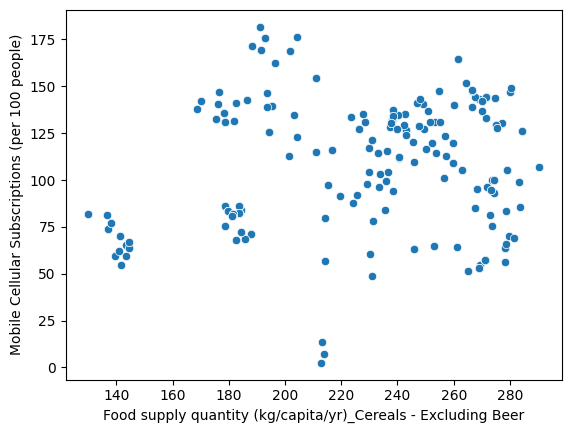

In [ ]:
import seaborn as sns
sns.scatterplot(
    data = df_merge_5,
    x = 'Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer',
    y = 'Mobile Cellular Subscriptions (per 100 people)'
)

We can see that in general there's a positive correlation between Mobile Cellular Subscriptions and Food Supply Quantity, despite some outliers exist. 

# 5. Regression

## 5.1 Transform　（updated) -- why only 2020?

In [ ]:
df_feat = df_merge_5.query("year == 2020")[[
    'Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer',
    'Mobile Cellular Subscriptions (per 100 people)'
]]
df_feat.head(5)

df_feat_with_control = df_merge_5.query("year == 2020")[[
    'Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer',
    'Mobile Cellular Subscriptions (per 100 people)',
    'Fertility rate, total (births per woman)', 
    'GDP per capita, PPP (constant 2021 international $)', 
    'Life expectancy at birth, total (years)', 
    'Mortality rate, infant (per 1,000 live births)', 
    'Population density (people per sq. km of land area)', 
    'Population growth (annual %)', 
    'Population, total',
    'Poverty headcount ratio at national poverty lines (% of population)',
    'Rural population (% of total population)',
    'Urban population (% of total population)'
]]

df_feat_with_control.head(5)


,Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Mobile Cellular Subscriptions (per 100 people),"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population)
13,189.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,189.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,278.99,105.291163,2.175,7015.197928,71.421,24.9,1277.544934,0.836311,166298024.0,NaN,61.823,38.177
38,278.99,105.291163,2.175,7015.197928,71.421,24.9,1277.544934,0.836311,166298024.0,NaN,61.823,38.177
39,278.99,105.291163,2.175,7015.197928,71.421,24.9,1277.544934,0.836311,166298024.0,NaN,61.823,38.177


In [ ]:
import numpy as np
df_feat = df_feat.assign(
    food_log = df_feat['Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer'].apply(np.log),
    mobile_log = df_feat['Mobile Cellular Subscriptions (per 100 people)'].apply(np.log)
)
df_feat.head(5)

ModuleNotFoundError: No module named 'numpy'

## 5.1.1 Transform (year 2011 -- 2023)

In [ ]:
import numpy as np

df_reg = df_merge_5.assign(
    food_log = df_merge_5['Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer'].apply(np.log),
    mobile_log = df_merge_5['Mobile Cellular Subscriptions (per 100 people)'].apply(np.log)
)
df_reg.head(5)



,Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Mobile Cellular Subscriptions (per 100 people)
13,189.06,NaN
14,189.06,NaN
37,278.99,105.291163
38,278.99,105.291163
39,278.99,105.291163


## 5.2 Regression

In [ ]:
# %pip install statsmodels

import statsmodels.api as sm


def regression(df, x, y):
    cols = x + [y]
    data = df[cols].dropna()
    X = data[x]
    X = sm.add_constant(X) # Capital X for convention
    Y = data[y] # Capital Y for convention

    # Create and fit the OLS model
    model = sm.OLS(Y, X)
    results = model.fit()

    return results.summary()


regression(
    df=df_feat,
    x=['mobile_log'],
    y='food_log'
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 28.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 31.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


KeyError: "None of [Index(['mobile_log', 'food_log'], dtype='object')] are in the [columns]"

There is a positive elasticity between mobile cellular subscriptions and food supply (measured as cereal supply per capita). A 10% increase in mobile subscriptions is associated with roughly a 2.7% increase in food supply, all else equal. However, the relationship is only marginally statistically significant, and the model explains a modest portion of the variation in food supply across countries.

## Regression with control variables 

In [ ]:
import statsmodels.api as sm

def ols(df, y_data, y_feat, x_data, x_feat, controls=None):
    y_col = f"{y_data}_{y_feat}" if y_feat else y_data
    x_col = f"{x_data}_{x_feat}" if x_feat else x_data

    # Include controls in column selection if provided
    cols = [y_col, x_col] + (controls if controls else [])
    data = df[cols].dropna()

    y = data[y_col]
    X = data[[x_col] + (controls if controls else [])]
    X = sm.add_constant(X)  # Add intercept

    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())


In [ ]:
controls=[
        'Fertility rate, total (births per woman)', 
                      'GDP per capita, PPP (constant 2021 international $)', 
                      'Life expectancy at birth, total (years)', 
                      'Mortality rate, infant (per 1,000 live births)', 
                      'Population density (people per sq. km of land area)', 
                      'Population growth (annual %)', 
                      'Population, total',
                      'Poverty headcount ratio at national poverty lines (% of population)',
                      'Rural population (% of total population)',
                      'Urban population (% of total population)'
    ]

In [ ]:
ols(
    df=df_feat_with_control,
    y_data='food',
    y_feat='log',  # apply log to ∏∏
    x_data='mobile',
    x_feat='log',  # apply log to X
   controls=controls
)


## 5.2.1 Regression(2011-2023)

In [ ]:
ols(
    df=df_reg,
    y_data='food',
    y_feat='log',  # apply log to ∏∏
    x_data='mobile',
    x_feat='log',  # apply log to X)
)